<img src="files/img/pandas.png" alt="Operations Across Axes" />

# [Pandas](http://pandas.pydata.org/) - Python Data Analysis Library
---
📢 But first the [news](https://pythonbytes.fm/episodes/show/101/nobel-prize-awarded-to-a-python-convert)!
---
## I shamelessly picked from these folks:
 - [Daniel Chen - Pandas for Data Analysis](https://www.youtube.com/watch?v=oGzU688xCUs)
 - [Jeff Delaney - 19 Essential Snippets in Pandas](https://jeffdelaney.me/blog/useful-snippets-in-pandas/)
 - [Burke Squires - Intro to Data Analysis with Python](https://github.com/burkesquires/python_biologist/tree/master/05_python_data_analysis)


## General Outline:
- What is Pandas all about?
- Brief intro to Pandas objects and syntax
- NumPy dataframe, show the basics
- Import gapminder dataset, interactive

## [Jupyter Notebook Shortcuts](http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html)
- documentation:
```python
type?
```
- check function arguments using: shift + tab
- run current cell/block: shift + enter 
- insert cell above: esc + a
- delete cell: esc (hold) + d + d (double tap)

<img src="files/img/python-scientific-ecosystem.png" alt="Python Scientific Ecosystem" />

## [Legend has it...](https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/ )
Pandas was develped by Wes McKinney (from Akron, Ohio!!!).  Math guy from MIT that went into finance, found that the problem with hedge fund management was dealing with the data (sourcing new data, merging it with the old, and cleaning it all up to optimize the input).  He got bummed out with Excel and R but was smitten with Python, though he realized there was no robust package for data analysis.  So he built Pandas in 2008 and released the project to the public in 2009.

Here's where it get's crazy, he left the world if finance to pursue a PhD in statistics at Duke, thus dropping Pandas development.  During that period he realized Python as a language could explode as a statistical computing language, it had the potential, but was still missing robust packages.  So he dropped out to push Pandas to become the a cornerstone of the Python scientific ecosystem.

And he put all his tips and tricks for Pandas into a book: [Python for Data Data Analysis](https://github.com/wesm/pydata-book)

## What is Pandas?

"It enables people to analyze and work with data who are not expert computer scientists.  You still have to write code, but it's making the code intuitive and accessible.  It helps people move beyond just using Excel for data analysis." ~Wes

- The go-to data analysis library for Python
    - Import and wrangle your raw data
    - Manipulate and visualize
- Allows for mixed data types in the same array

### The DataFrame is your friend!
- Two primary object types used in Pandas:
    - DataFrames - like an Excel spreadsheet
    - Series - like a single column in a spreadsheet
- DataFrames are the primary object used in Pandas (it's like an Excel sheet)
- Each DataFrame has:
    - columns: the variables being measured
    - rows: the observations being made
    - index: maintains the order of the rows
- Executing an action across an axis
    - Axis 0 = default, 'index', perform action along index (performing in each column)
    - Axis 1 = 'columns', perform action along columns (performing for each row)
    - This is kinda wonky, but you can think of it like this:
        - Axis 0 will give me mean of each column
        - Axis 1 will give me the mean of each row

<img src="files/img/dataframe.jpg" alt="Pandas DataFrame" />

# Getting Started
---
You can import LOADS of different file types into Pandas as a DataFrame.  The most common that you may run into would be .csv and Excel files, but we're going to start by using a NumPy array as the input for our DataFrame.

## Create A NumPy Array Of Test Data

In [1]:
# check numpy version
import numpy as np
print('NumPy version:',np.version.version)

NumPy version: 1.14.3


In [2]:
# create an object "array" that is a 4x100 numpy ndarray (use numpy.random.randint())
# be sure to set the seed to 0 if you want to replicate the results
np.random.seed(0)
array = np.random.randint(0,100,size=(20,4))
array

array([[44, 47, 64, 67],
       [67,  9, 83, 21],
       [36, 87, 70, 88],
       [88, 12, 58, 65],
       [39, 87, 46, 88],
       [81, 37, 25, 77],
       [72,  9, 20, 80],
       [69, 79, 47, 64],
       [82, 99, 88, 49],
       [29, 19, 19, 14],
       [39, 32, 65,  9],
       [57, 32, 31, 74],
       [23, 35, 75, 55],
       [28, 34,  0,  0],
       [36, 53,  5, 38],
       [17, 79,  4, 42],
       [58, 31,  1, 65],
       [41, 57, 35, 11],
       [46, 82, 91,  0],
       [14, 99, 53, 12]])

In [3]:
# check the type of the array object
type(array)

numpy.ndarray

## Create A Pandas DataFrame

In [4]:
# import the pandas library
import pandas as pd
print('Pandas version:', pd.__version__)

Pandas version: 0.23.0


In [5]:
# checkout the documentation for a DataFrame (?)
pd.DataFrame?

In [6]:
# create a Pandas DataFrame object called "df" from the "array" object we made earlier
df = pd.DataFrame(data=array, index=None, columns=None, dtype=None)

## Exploring A DataFrame

In [7]:
# check out what the "df" looks like
df

,0,1,2,3
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88
5,81,37,25,77
6,72,9,20,80
7,69,79,47,64
8,82,99,88,49
9,29,19,19,14


In [8]:
# check the "df" shape
df.shape

(20, 4)

In [9]:
# you can also use the len() function to get the number or rows/observations
len(df)

20

In [10]:
# get a concise summary of the DataFrame with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
0    20 non-null int64
1    20 non-null int64
2    20 non-null int64
3    20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


In [11]:
# view brief descriptive stats of the DataFrame
df.describe()

,0,1,2,3
count,20.000000,20.000000,20.000000,20.000000
mean,48.300000,50.950000,44.000000,45.950000
std,22.271294,30.539836,30.045579,30.536389
min,14.000000,9.000000,0.000000,0.000000
25%,34.250000,31.750000,19.750000,13.500000
50%,42.500000,42.000000,46.500000,52.000000
75%,67.500000,79.750000,66.250000,68.750000
max,88.000000,99.000000,91.000000,88.000000


In [12]:
# view the top 5 rows
# you can input how many rows you want, default is 5
df.head() 

,0,1,2,3
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88


In [13]:
# view the bottom 5 rows
df.tail()

,0,1,2,3
15,17,79,4,42
16,58,31,1,65
17,41,57,35,11
18,46,82,91,0
19,14,99,53,12


In [14]:
# take a sample of random rows/observations
df.sample(5)

,0,1,2,3
9,29,19,19,14
16,58,31,1,65
7,69,79,47,64
1,67,9,83,21
0,44,47,64,67


## Manipulating DataFrame Columns (Variables)

In [15]:
# view current columns 
df.columns

RangeIndex(start=0, stop=4, step=1)

In [16]:
# send current column names to a list
cols = df.columns.tolist()
cols

[0, 1, 2, 3]

In [17]:
# change column names
# create a list of new column names "a"-"d"
# must be same length the number of columns in the "df"
cols = ['a', 'b', 'c', 'd']

# set "df.columns" to the new list of names
df.columns = cols

# check the change by viewing the head of the dataframe
df.head()

,a,b,c,d
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88


In [18]:
# select just column "a"
df['a']

0     44
1     67
2     36
3     88
4     39
5     81
6     72
7     69
8     82
9     29
10    39
11    57
12    23
13    28
14    36
15    17
16    58
17    41
18    46
19    14
Name: a, dtype: int64

In [19]:
# check the type of column "a"
# notice that a single column is a "Series" object in Pandas
type(df['a'])

pandas.core.series.Series

In [20]:
# insert a new column (called "new_column") and put a string in each cell
df['new_column'] = 'cheese'
df.head()

,a,b,c,d,new_column
0,44,47,64,67,cheese
1,67,9,83,21,cheese
2,36,87,70,88,cheese
3,88,12,58,65,cheese
4,39,87,46,88,cheese


In [21]:
# shuffling column positions

# make a list of the current column order
cols = df.columns.tolist()
print('Starting column order:', cols)

# manipulate column names as a list object
# reverse column order with [::-1]
rev_order = cols[::-1]
print('Reverse column order:', rev_order)

# move last column to first (hint: [-1:] + [:-1])
new_order = cols[-1:] + cols[:-1]
print('Last to first order:', new_order)

# set the column order (creates new dataframe)
df = df[new_order]
df.head()

Starting column order: ['a', 'b', 'c', 'd', 'new_column']
Reverse column order: ['new_column', 'd', 'c', 'b', 'a']
Last to first order: ['new_column', 'a', 'b', 'c', 'd']


,new_column,a,b,c,d
0,cheese,44,47,64,67
1,cheese,67,9,83,21
2,cheese,36,87,70,88
3,cheese,88,12,58,65
4,cheese,39,87,46,88


In [22]:
# drop/remove "new_column" from the dataframe
df.drop(columns='new_column')

,a,b,c,d
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88
5,81,37,25,77
6,72,9,20,80
7,69,79,47,64
8,82,99,88,49
9,29,19,19,14


In [23]:
# check if the column is really gone
df.columns

Index(['new_column', 'a', 'b', 'c', 'd'], dtype='object')

In [24]:
# write returned df to a new object
scratch = df.drop(columns='new_column')
scratch.head()

,a,b,c,d
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88


In [25]:
# we still have our original df
df.head()

,new_column,a,b,c,d
0,cheese,44,47,64,67
1,cheese,67,9,83,21
2,cheese,36,87,70,88
3,cheese,88,12,58,65
4,cheese,39,87,46,88


In [26]:
# Alternative to drop a column:
# use 'inplace=True' to overwrite existing dataframe
df.drop(columns='new_column', inplace=True)
df.head()

/Users/chambersmj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,a,b,c,d
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88


## Calculating Values from the DataFrame

In [27]:
# Pandas has basic arithmetic functions built-in
df.sum()

a     966
b    1019
c     880
d     919
dtype: int64

## Axis Key
- 0 == Calculate statistic for each column (across rows)
- 1 == Calculate statistic for each row (across columns)
  
<img src="files/img/python-operations-across-axes.svg" alt="Operations Across Axes" />

* The axis key is reversed when using the drop() function to remove columns/rows

In [28]:
# get the sum of each row by setting the axis to 1
df.sum(axis=1)

0     222
1     180
2     281
3     223
4     260
5     220
6     181
7     259
8     318
9      81
10    145
11    194
12    188
13     62
14    132
15    142
16    155
17    144
18    219
19    178
dtype: int64

In [29]:
# get the sum of columns ['a', 'b'] for each row
df[['a', 'b']].sum(axis=1)

0      91
1      76
2     123
3     100
4     126
5     118
6      81
7     148
8     181
9      48
10     71
11     89
12     58
13     62
14     89
15     96
16     89
17     98
18    128
19    113
dtype: int64

In [30]:
# add a new column called "sum" containing the sum of each row
df['sum'] = df.sum(axis=1)
df.head()

,a,b,c,d,sum
0,44,47,64,67,222
1,67,9,83,21,180
2,36,87,70,88,281
3,88,12,58,65,223
4,39,87,46,88,260


In [31]:
# does the sum stay updated?
# insert a new row of random integers and see if values in "sum" change
df['e'] = np.random.randint(0,100, size=df.shape[0])
df.head()

,a,b,c,d,sum,e
0,44,47,64,67,222,35
1,67,9,83,21,180,64
2,36,87,70,88,281,95
3,88,12,58,65,223,69
4,39,87,46,88,260,94


---
## Exercise
1. Make an object titled "df3" that is a copy of "df"
2. Add a column to "df3" that expresses the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) of the values in columns a, b, c, and d across each row 
    * What axis refers to calculations across a row?
3. Make an object titled "df4" that is a copy of "df3" and delete column "c" from df4 
    * Do the values in the "mean" column change?

In [32]:
# Make an object titled "df3" that is a copy of "df"
df3 = df

In [33]:
# create a mean column in df3 that calculates the mean across each row
# be sure to exclue the sum value from the mean
df3['mean'] = df.mean(axis=1)
df3.head()

,a,b,c,d,sum,e,mean
0,44,47,64,67,222,35,79.833333
1,67,9,83,21,180,64,70.666667
2,36,87,70,88,281,95,109.500000
3,88,12,58,65,223,69,85.833333
4,39,87,46,88,260,94,102.333333


In [34]:
# make a copy of df3 named df4, delete column "c"
df4 = df3
df4.drop(columns='c', inplace=True)
df4.head()

,a,b,d,sum,e,mean
0,44,47,67,222,35,79.833333
1,67,9,21,180,64,70.666667
2,36,87,88,281,95,109.500000
3,88,12,65,223,69,85.833333
4,39,87,88,260,94,102.333333


---
## Combining DataFrames
Before getting into the manipulation of DataFrame rows it helps to understand a bit more about index values and combined dataframes
<img src="files/img/concat_axis0.png" alt="concat axis0" />

In [35]:
# create two new DataFrames from NumPy values
df_index1 = pd.DataFrame(np.random.randint(0,100, size = (50,4)), 
                         columns = ['a', 'b', 'c', 'd'])
df_index2 = pd.DataFrame(np.random.randint(0,100, size = (50,4)), 
                         columns = ['a', 'b', 'c', 'd'])

In [36]:
# Use pd.concat() to combine the two DataFrames by stacking vertically (hint: axis=0)
cat_df = pd.concat([df_index1, df_index2], axis=0) # what happens if the axis is 1?
cat_df.shape

(100, 4)

In [37]:
# check the index
cat_df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  0,
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [38]:
# reset_index() will generate a column with the old index
# use this function when you want to reset the order of the index
reset = cat_df.reset_index()
# reset = cat_df.reset_index(drop=True) # use this to drop the new column with old index
reset.tail()

,index,a,b,c,d
95,45,36,99,69,6
96,46,3,98,40,60
97,47,33,28,68,26
98,48,96,51,73,53
99,49,69,33,7,94


## Manipulating DataFrame Rows (Observations)
Two important functions to introduce here are loc() and iloc()
- loc[ ] - accesses the index based on the value
- iloc[ ] - accesses the index based on the position.  
You may come across ix[ ] to select rows, but this function has depreciated 

Tips for specifying indexers:
- series.loc[indexer]
- dataframe.loc[row_indexer, column_indexer]

In [39]:
# We're going back to the concatenated Dataframe that was NOT reindexed

# select a row based on the index value using loc
cat_df.loc[0]

,a,b,c,d
0,58,23,59,2
0,93,46,21,73


In [40]:
# compare this with selecting a row using iloc
cat_df.iloc[0]

a    58
b    23
c    59
d     2
Name: 0, dtype: int64

In [41]:
# changing all the values in a specific row (position 0)
cat_df.iloc[0] = [44, 45, 46, 47]
cat_df.head()

,a,b,c,d
0,44,45,46,47
1,98,62,35,94
2,67,82,46,99
3,20,81,50,27
4,14,41,58,65


In [42]:
# change a single value in a row using loc[] (hint: loc uses names)
cat_df.loc[0,'d'] = 50
cat_df.head()

,a,b,c,d
0,44,45,46,50
1,98,62,35,94
2,67,82,46,99
3,20,81,50,27
4,14,41,58,65


In [43]:
# add a row using loc[] 
# (hint: use the length of cat_df to position the new row at end)
cat_df.loc[len(cat_df)] = [1,2,3,4]
cat_df.tail()

,a,b,c,d
46,3,98,40,60
47,33,28,68,26
48,96,51,73,53
49,69,33,7,94
100,1,2,3,4


In [44]:
# delete the row that was just added using drop()
new = cat_df.drop(100)
new.tail()

,a,b,c,d
45,36,99,69,6
46,3,98,40,60
47,33,28,68,26
48,96,51,73,53
49,69,33,7,94


## Exporting A DataFrame
If you want to save your work you can [pickle](https://ianlondon.github.io/blog/pickling-basics/) the DataFrame or you could export it as a file

In [45]:
# saving the "new" DataFrame as a .csv file, can export in multiple file types
new.to_csv('my_dataframe.csv', sep=',')

## Plots
In general, the [Matplotlib](https://matplotlib.org/) library is the go-to for plots and figures, but Pandas has a plot() function that uses matplotlib to generate basic visualizaitons

In [46]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt
% matplotlib inline

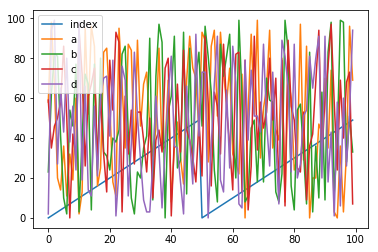

In [47]:
# you can use the Pandas plot() function to return a matplotlib.axes.AxesSubplot object
reset.plot(x=None, y=None, kind='line')

Text(0,0.5,'y label')

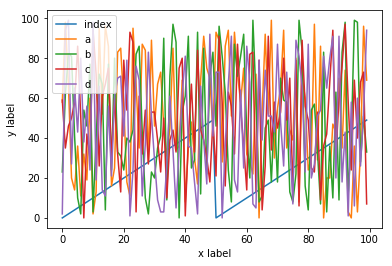

In [48]:
# you can alter that object using matplotlib commands/functions
# save generated plot as "ax" and add labels (hint: use set_xlabel())
ax = reset.plot(x=None, y=None, kind='line')
ax.set_xlabel('x label')
ax.set_ylabel('y label')

In [49]:
# save the figure by using get_figure() to extract the plot as 
# a matplotlib.figure.Figure object
# (hint: save ax object as "fig", then use savefig())
fig = ax.get_figure()
fig.savefig('figure.png')

## Exercise
- For reproducability, set your RandomState seed to 2000
- Create a dataframe with 10000 observations (can use NumPy)
    - Variable "a": randomly assign a value of 0 or 1
    - Variable "b": randomly assign a value from a normal distribution (center of 0 and a standard deviation of 1)
- make a histogram of the distrubution of variable "b"
- filter dataframe down to the 90th percentile of variable "b" and plot histogram for "b"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172929b0>]],
      dtype=object)

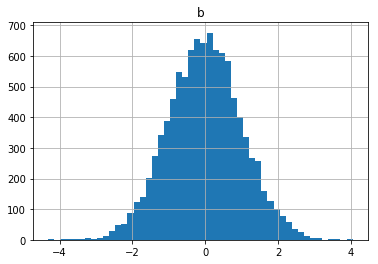

In [50]:
# solution
np.random.seed(2000)
a = np.random.randint(low=0,high=2,size=10000)
b = np.random.normal(loc=0, scale=1, size=10000)

abc_dict = {'a':a,'b':b}

df = pd.DataFrame(abc_dict)

df.hist('b', bins=50)

In [51]:
# threshhold for 90th percentile of "b"
df.quantile(.90)

a    1.000000
b    1.290272
Name: 0.9, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117405748>]],
      dtype=object)

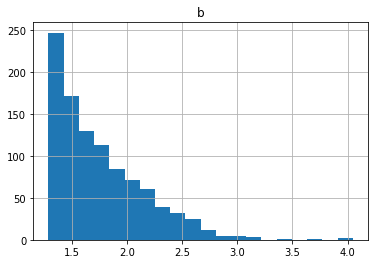

In [52]:
# select values above threshhold for "b"
df1 = df[df['b'] > 1.29]
df1.hist('b', bins=20)

# Working With Heterogeneous Data
---
## Import a .csv as a Pandas DataFrame

In [53]:
# import a .csv file to a DataFrame
df = pd.read_csv('data/gapminder.tsv', 
                 sep='\t', # the delimiter in the file
                 header='infer', # row with names of the columns 
                 names=None, # change the names of the columns
                 index_col=None, # column to use for the row index
                 usecols=None) # what columns to use
df.head()

,country,continent,year,life-exp,pop,gdp per cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [54]:
# strip-down column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Take A Glance At The DataFrame

In [55]:
# shape, columns, values


## Techniques To Filter Data

In [56]:
# Sorting
# Why not sort the df by year in ascending order (hint: use sort_values())
df = df.sort_values('year', axis=0, ascending=True)
df = df.reset_index(drop=True)
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,France,Europe,1952,67.410,42459667,7029.809327
2,Gabon,Africa,1952,37.003,420702,4293.476475
3,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
4,Gambia,Africa,1952,30.000,284320,485.230659


In [57]:
# Unique Values
# Get a list of the countries represented using unique()
countries = df.country.unique()
len(countries)

142

In [58]:
# What about continents?
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [59]:
# Using the groupby() function:
df.groupby('continent')['country'].unique()

continent
Africa      [Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, ...
Americas    [Guatemala, Haiti, Honduras, Jamaica, Brazil, ...
Asia        [Afghanistan, West Bank and Gaza, Hong Kong, C...
Europe      [France, Germany, Greece, Finland, Hungary, Ir...
Oceania                              [New Zealand, Australia]
Name: country, dtype: object

In [60]:
# How would I get a list of the countries that fall within "Oceania"?
df.groupby('continent')['country'].unique()['Oceania']

array(['New Zealand', 'Australia'], dtype=object)

In [61]:
# nunique()
# How many countries are represented by each continent?
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [62]:
# What about a dictionary containing all the countries for each continent?
# hint: create a groupby object and use the todict() function
countries = df.groupby('continent')['country'].unique()
country_dict = countries.to_dict()
country_dict['Africa']

array(['Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic',
       'Zambia', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Reunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Uganda', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Angola', 'Zimbabwe', 'Algeria',
       'Benin'], dtype=object)

In [63]:
# use dictionary to get number of countries in Africa
len(country_dict['Africa'])

52

In [64]:
# Filter Using Conditional Logic
# What if we just want a DataFrame of all the African countries?
africa = df[df['continent'] == 'Africa']
africa.head()

,country,continent,year,life_exp,pop,gdp_per_cap
2,Gabon,Africa,1952,37.003,420702,4293.476475
4,Gambia,Africa,1952,30.000,284320,485.230659
6,Ghana,Africa,1952,43.149,5581001,911.298937
9,Guinea,Africa,1952,33.609,2664249,510.196492
10,Guinea-Bissau,Africa,1952,32.500,580653,299.850319


In [65]:
# reset the index
africa = africa.reset_index(drop=True)

In [66]:
# explore the new africa df
africa.describe()

,year,life_exp,pop,gdp_per_cap
count,624.00000,624.00000,6.240000e+02,624.000000
mean,1979.50000,48.86533,9.916003e+06,2193.754578
std,17.27411,9.15021,1.549092e+07,2827.929863
min,1952.00000,23.59900,6.001100e+04,241.165877
25%,1965.75000,42.37250,1.342075e+06,761.247010
50%,1979.50000,47.79200,4.579311e+06,1192.138217
75%,1993.25000,54.41150,1.080149e+07,2377.417422
max,2007.00000,76.44200,1.350312e+08,21951.211760


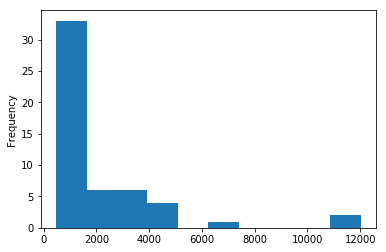

In [67]:
# create a new series with the mean gdp per cap for each country in africa
mean_gdp_country = africa.groupby('country')['gdp_per_cap'].mean()
mean_gdp_country.plot(kind='hist')

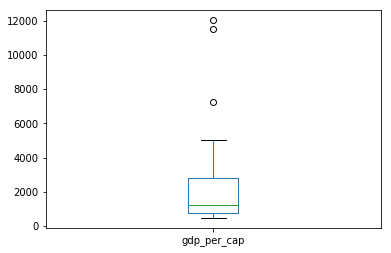

In [68]:
# create a boxplot
mean_gdp_country.plot(kind='box')

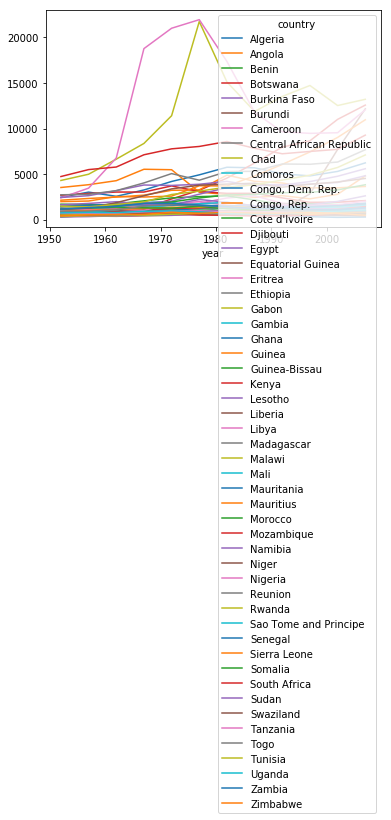

In [69]:
# view gdp changes over time for each country using pivot
# hint: index='year', columns='country', values='gdp_per_cap'
gdp_time = africa.pivot('year','country','gdp_per_cap')
gdp_time.plot()

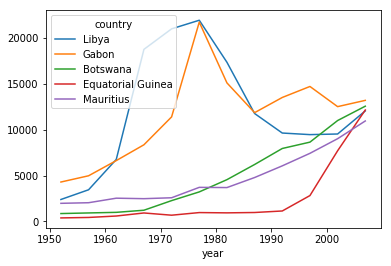

In [70]:
# what are the countries that peak out over 10,000 gdp-per-cap units?
high_countries = africa[africa['gdp_per_cap'] > 10000]['country'].unique().tolist()
gdp_time[high_countries].plot()

# Misc.
---
## Create a Pandas DataFrame from a dictionary

In [71]:
# create a dictionary object
my_dict = {'a':['cheese', 'dog', 'goat', '4h'], 'b':['lush','planet', '2017', 'la trance'] }

# create a pandas DataFrame from a dictionary
df = pd.DataFrame(my_dict)
df

,a,b
0,cheese,lush
1,dog,planet
2,goat,2017
3,4h,la trance


In [72]:
# create a new dataframe from groupby() using .reset_index()
df = pd.read_csv('data/gapminder.tsv', sep='\t')
group = df.groupby('continent')['country'].unique().reset_index() # reseting the index is key
group

,continent,country
0,Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,Americas,"[Argentina, Bolivia, Brazil, Canada, Chile, Co..."
2,Asia,"[Afghanistan, Bahrain, Bangladesh, Cambodia, C..."
3,Europe,"[Albania, Austria, Belgium, Bosnia and Herzego..."
4,Oceania,"[Australia, New Zealand]"


In [73]:
# column containing list of values, count those values as value for new column
group['num_countries'] = group['country'].str.len()
group

,continent,country,num_countries
0,Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",52
1,Americas,"[Argentina, Bolivia, Brazil, Canada, Chile, Co...",25
2,Asia,"[Afghanistan, Bahrain, Bangladesh, Cambodia, C...",33
3,Europe,"[Albania, Austria, Belgium, Bosnia and Herzego...",30
4,Oceania,"[Australia, New Zealand]",2


In [74]:
# clean-up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')